## 3주차 토큰 & 벡터화 / BoW / TF-IDF / 워드 클라우드

### 1. NLTK 실습

- Colab에서 NLTK 오류 발생으로 인해 TreebankWordTokenizer 사용
- nltk.word_tokenize 함수 내부에서 사용되는 토크나이저
- punkt 리소스를 필요로 하지 않음

In [1]:
from nltk.tokenize import TreebankWordTokenizer

text = "I want to go home early and take a break"
tokenizer = TreebankWordTokenizer()
tokens = tokenizer.tokenize(text)

print(tokens)

['I', 'want', 'to', 'go', 'home', 'early', 'and', 'take', 'a', 'break']


### 2. spaCy 실습

In [2]:
!pip install spacy
!python -m spacy download en_core_web_sm # 영어 모델 다운로드

import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("I want to go home early and take a break")
for token in doc:
    print(token.text, token.pos_)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 62.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
I PRON
want VERB
to PART
go VERB
home ADV
early ADV
and CCONJ
take VERB
a DET
break NOUN


### 3. KoNLPy 실습

In [3]:
!pip install konlpy # Java가 로컬에 설치되어 있지 않다면 코랩 실행 추천

from konlpy.tag import Okt

okt = Okt()
text = "오늘은 집에 일찍 들어가서 쉬고 싶다."
print(okt.morphs(text))   # 형태소 분리
print(okt.pos(text))      # 품사 태깅

['오늘', '은', '집', '에', '일찍', '들어가서', '쉬', '고', '싶다', '.']
[('오늘', 'Noun'), ('은', 'Josa'), ('집', 'Noun'), ('에', 'Josa'), ('일찍', 'Noun'), ('들어가서', 'Verb'), ('쉬', 'Noun'), ('고', 'Josa'), ('싶다', 'Verb'), ('.', 'Punctuation')]


### 4. Transformers 실습

In [4]:
!pip install transformers

from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
text = "오늘은 집에 일찍 들어가서 쉬고 싶다."
tokens = tokenizer.tokenize(text)
print(tokens)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


['ᄋ', '##ᅩ', '##ᄂ', '##ᅳ', '##ᆯ', '##ᄋ', '##ᅳ', '##ᆫ', 'ᄌ', '##ᅵ', '##ᆸ', '##ᄋ', '##ᅦ', '[UNK]', 'ᄃ', '##ᅳ', '##ᆯ', '##ᄋ', '##ᅥ', '##ᄀ', '##ᅡ', '##ᄉ', '##ᅥ', '[UNK]', '[UNK]', '.']


### 5. BoW 실습

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

docs = ["나는 밥을 먹었다", "밥을 먹고 학교에 갔다", "학교에서 공부를 했다"]

bow_vectorizer = CountVectorizer()
bow = bow_vectorizer.fit_transform(docs)

print("단어 사전 :", bow_vectorizer.get_feature_names_out())
print("BoW 벡터 :\n", bow.toarray())

단어 사전 : ['갔다' '공부를' '나는' '먹고' '먹었다' '밥을' '학교에' '학교에서' '했다']
BoW 벡터 :
 [[0 0 1 0 1 1 0 0 0]
 [1 0 0 1 0 1 1 0 0]
 [0 1 0 0 0 0 0 1 1]]


### 6. TF-IDF 실습

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

docs = ["나는 밥을 먹었다", "밥을 먹고 학교에 갔다", "학교에서 공부를 했다"]

tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(docs)

print("단어 사전:", tfidf_vectorizer.get_feature_names_out())
print("TF-IDF 벡터:\n", tfidf.toarray())

단어 사전: ['갔다' '공부를' '나는' '먹고' '먹었다' '밥을' '학교에' '학교에서' '했다']
TF-IDF 벡터:
 [[0.         0.         0.62276601 0.         0.62276601 0.4736296
  0.         0.         0.        ]
 [0.52863461 0.         0.         0.52863461 0.         0.40204024
  0.52863461 0.         0.        ]
 [0.         0.57735027 0.         0.         0.         0.
  0.         0.57735027 0.57735027]]


### 7. Word2Vec 실습

In [7]:
!pip install numpy==1.23.5 scipy==1.10.1 gensim==4.3.1 --upgrade --force-reinstall

  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
  Using cached scipy-1.10.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (58 kB)
  Using cached gensim-4.3.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.4 kB)
  Using cached smart_open-7.1.0-py3-none-any.whl.metadata (24 kB)
  Using cached wrapt-1.17.2-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.4 kB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
Using cached scipy-1.10.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.1 MB)
Using cached gensim-4.3.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.6 MB)
Using cached smart_open-7.1.0-py3-none-any.whl (61 kB)
Using cached wrapt-1.17.2-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (83 kB)
  At

In [8]:
!pip install gensim

from gensim.models import Word2Vec
from konlpy.tag import Okt

# 토크나이저 준비
okt = Okt()
docs = ["나는 밥을 먹었다", "밥을 먹고 학교에 갔다", "학교에서 공부를 했다"]
tokenized_docs = [okt.morphs(doc) for doc in docs]

# Word2Vec 모델 학습
model = Word2Vec(sentences=tokenized_docs, vector_size=100, window=5, min_count=1, sg=1)

# 단어 벡터 확인
print("📌 '밥' 벡터:\n", model.wv['밥'])

# 단어 유사도 확인
print("📌 '밥'과 비슷한 단어:\n", model.wv.most_similar('밥'))

📌 '밥' 벡터:
 [ 9.4563962e-05  3.0773198e-03 -6.8126451e-03 -1.3754654e-03
  7.6685809e-03  7.3464094e-03 -3.6732971e-03  2.6427018e-03
 -8.3171297e-03  6.2054861e-03 -4.6373224e-03 -3.1641065e-03
  9.3113566e-03  8.7338570e-04  7.4907029e-03 -6.0740625e-03
  5.1605068e-03  9.9228229e-03 -8.4573915e-03 -5.1356913e-03
 -7.0648370e-03 -4.8626517e-03 -3.7785638e-03 -8.5361991e-03
  7.9556061e-03 -4.8439382e-03  8.4236134e-03  5.2625705e-03
 -6.5500261e-03  3.9578713e-03  5.4701497e-03 -7.4265362e-03
 -7.4057197e-03 -2.4752307e-03 -8.6257253e-03 -1.5815723e-03
 -4.0343284e-04  3.2996845e-03  1.4418805e-03 -8.8142155e-04
 -5.5940580e-03  1.7303658e-03 -8.9737179e-04  6.7936908e-03
  3.9735902e-03  4.5294715e-03  1.4343059e-03 -2.6998555e-03
 -4.3668128e-03 -1.0320747e-03  1.4370275e-03 -2.6460087e-03
 -7.0737829e-03 -7.8053069e-03 -9.1217868e-03 -5.9351693e-03
 -1.8474245e-03 -4.3238713e-03 -6.4606704e-03 -3.7173224e-03
  4.2891586e-03 -3.7390434e-03  8.3781751e-03  1.5339935e-03
 -7.2423196e-

## 8. World Cloud 실습

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 47 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (10.5 MB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 126213 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
True


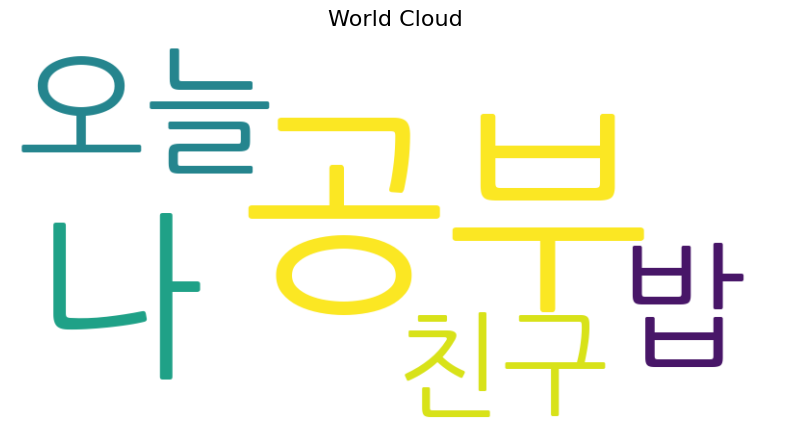

In [1]:
!pip install konlpy wordcloud matplotlib

# 나눔글꼴 설치
!apt-get update -qq
!apt-get install -y fonts-nanum

# matplotlib 기본 폰트로 설정
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'

# 설치된 폰트 경로 확인
import os
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
print(os.path.exists(font_path))  # True여야 정상


from konlpy.tag import Okt
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 샘플 텍스트
text = "나는 오늘도 공부를 하고 밥을 먹고 공부를 했다. 공부는 나의 친구다."

# 형태소 분석기
okt = Okt()

# 명사 추출
nouns = okt.nouns(text)

# 단어 빈도 계산
from collections import Counter
word_count = Counter(nouns)

# 상위 50개 단어만 사용
most_common = dict(word_count.most_common(50))

# 워드클라우드 객체 생성
wc = WordCloud(
    font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
    background_color='white',
    width=800,
    height=400
)

# 워드클라우드 생성
cloud = wc.generate_from_frequencies(most_common)

# 시각화
plt.figure(figsize=(10, 5))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.title("World Cloud", fontsize=16)
plt.show()

## 9. 영화 리뷰 데이터 기반 워드 클라우드 실습

In [2]:
!apt-get update -qq
!apt-get install -y fonts-nanum
!pip install konlpy

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 47 not upgraded.


In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 47 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [4]:
import urllib.request
train_url = "https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt"
urllib.request.urlretrieve(train_url, "ratings_train.txt")

('ratings_train.txt', <http.client.HTTPMessage at 0x79f579906290>)

In [5]:
import pandas as pd
from konlpy.tag import Okt
from wordcloud import WordCloud
from collections import Counter
import re

In [6]:
train_data = pd.read_table("ratings_train.txt")
train_data = train_data.dropna()
reviews = train_data['document'].tolist()

In [7]:
text = ' '.join(reviews[:5000])
text = re.sub(r'[^ㄱ-ㅎ가-힣\s]', '', text)

In [8]:
okt = Okt()
words = []
for word, tag in okt.pos(text, stem=True):
    if tag in ['Noun', 'Adjective', 'Verb']:
        if len(word) > 1:
            words.append(word)

In [9]:
word_freq = Counter(words)
top_words = dict(word_freq.most_common(50))

In [10]:
wc = WordCloud(
    font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
    background_color='white',
    width=800,
    height=400
).generate_from_frequencies(top_words)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50689 (\N{HANGUL SYLLABLE YEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48624 (\N{HANGUL SYLLABLE BYU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50892 (\N{HANGUL SYLLABLE WEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr

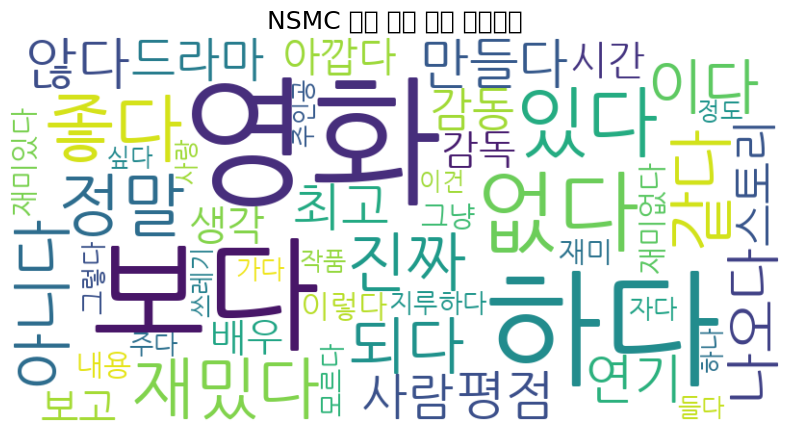

In [11]:
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("NSMC 영화 리뷰 워드 클라우드", fontsize=18)
plt.show()